In [431]:
# https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
# Used some of the stuff described in that tutorial

In [11]:
import pandas as pd
import datetime
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
pdf = pd.read_csv('poloniex_usdt_pairs.csv')

/Users/bochaolu1/anaconda3/envs/data-x/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
new_df = pd.DataFrame(pdf[80000:])
new_df = new_df.set_index('Unnamed: 0').apply(lambda x: pd.Series([float(i) for i in x]))

In [14]:
#pdf.head()
new_df.head()

,USDT_BTC,USDT_BTC.1,USDT_BTC.2,USDT_XRP,USDT_XRP.1,USDT_XRP.2,USDT_BCH,USDT_BCH.1,USDT_BCH.2,USDT_ETH,...,USDT_ZEC.2,USDT_DASH,USDT_DASH.1,USDT_DASH.2,USDT_NXT,USDT_NXT.1,USDT_NXT.2,USDT_REP,USDT_REP.1,USDT_REP.2
0,15.053280,65297.193869,4337.738729,57147.853758,13414.622655,0.234735,73.150991,25865.666215,353.592832,38.625154,...,249.670430,0.656274,199.224148,303.568395,2023.039455,128.837892,0.063685,1.149349,21.814644,18.98
1,24.507875,106364.194252,4340.000671,84439.682456,19843.129700,0.234998,27.425880,9660.370833,352.235586,66.808515,...,249.389082,4.295408,1305.800852,303.999292,8994.666113,573.991670,0.063815,13.535738,256.908299,18.98
2,16.628436,72155.225084,4339.267071,465900.930382,109677.475859,0.235409,37.894933,13405.921634,353.765548,36.444964,...,250.508302,6.958944,2119.026539,304.504053,10155.004929,642.226979,0.063242,0.000000,0.000000,18.98
3,2.806096,12179.132834,4340.240293,65804.299183,15477.307105,0.235202,12.565475,4420.411268,351.790228,80.702077,...,249.336017,0.022988,6.988206,303.999986,5269.807759,335.498228,0.063664,0.000000,0.000000,18.98
4,27.612624,119525.405168,4328.650685,21098.099687,4959.193366,0.235054,23.879860,8408.339107,352.110065,8.554216,...,248.869287,2.866607,868.777777,303.068305,12639.474684,807.035495,0.063850,0.000000,0.000000,18.98


In [5]:
#The goal is to create a column of 0 and 1 (1 when x(n) - (x(n-1)) > 0) x being bitcoin price
growth_binary_arr = [0]
for i in range(len(new_df['USDT_BTC.2'])):
    if i == 0:
        continue
    diff = new_df['USDT_BTC.2'][i] - new_df['USDT_BTC.2'][i-1]
    bin_res = 1 if diff > 0 else 0
    growth_binary_arr.append(bin_res)

In [385]:
new_df['new'] = growth_binary_arr

In [386]:
#The goal is to increment 1s so if we have a sequence 1,1,1,1 then we transform in 1,2,3,4
#If we have 1,1,1,1,1,0,1,1,0,0,0,1 then we get 1,2,3,4,5,0,1,2,0,0,0,1
incremental_index = []
for i in range(len(hipso)):
    if growth_binary_arr[i] == 0:
        incremental_index.append(0)
        continue
    else:
        t = 1
        for y in hipso[i+1:]:
            if growth_binary_arr[y] == 1:
                t += 1
            else:
                incremental_index.append(t)
                break

In [387]:
new_df['guess'] = hip_new

In [389]:
new_df.head(5)

,USDT_BTC,USDT_BTC.1,USDT_BTC.2,USDT_XRP,USDT_XRP.1,USDT_XRP.2,USDT_BCH,USDT_BCH.1,USDT_BCH.2,USDT_ETH,...,USDT_DASH.1,USDT_DASH.2,USDT_NXT,USDT_NXT.1,USDT_NXT.2,USDT_REP,USDT_REP.1,USDT_REP.2,new,guess
0,15.053280,65297.19387,4337.738729,57147.85376,13414.622650,0.234735,73.150991,25865.666210,353.592832,38.625154,...,199.224148,303.568395,2023.039455,128.837892,0.063685,1.149349,21.814644,18.98,0,0
1,24.507875,106364.19430,4340.000671,84439.68246,19843.129700,0.234998,27.425880,9660.370833,352.235586,66.808515,...,1305.800852,303.999292,8994.666113,573.991670,0.063815,13.535738,256.908299,18.98,1,1
2,16.628436,72155.22508,4339.267071,465900.93040,109677.475900,0.235409,37.894933,13405.921630,353.765548,36.444964,...,2119.026539,304.504053,10155.004930,642.226979,0.063242,0.000000,0.000000,18.98,0,0
3,2.806096,12179.13283,4340.240293,65804.29918,15477.307110,0.235202,12.565475,4420.411268,351.790228,80.702077,...,6.988206,303.999986,5269.807759,335.498228,0.063664,0.000000,0.000000,18.98,1,1
4,27.612624,119525.40520,4328.650685,21098.09969,4959.193366,0.235054,23.879860,8408.339107,352.110065,8.554216,...,868.777777,303.068305,12639.474680,807.035495,0.063850,0.000000,0.000000,18.98,0,0


In [390]:
new_df = new_df.fillna(0)

In [433]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import LSTM
import numpy as np


In [393]:
scaler = MinMaxScaler()
scaler.fit(new_df.values)
data_train = scaler.transform(new_df.values)

In [322]:

# load and prepare the dataset
X_train = numpy.reshape(data_train, (data_train.shape[0], 1, data_train.shape[1]))

X = X_train[:,0,:-2]
Y = X_train[:,0,-1]
#X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
# 1. define the network
model = Sequential()
model.add(Dense(50, input_dim=36, activation='relu'))
model.add(Dense(50, activation='relu'))
#model.add(LSTM(5))
model.add(Dense(1, activation='sigmoid'))
# 2. compile the network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 3. fit the network
history = model.fit(X, Y, epochs=1, batch_size=5)
# 4. evaluate the network
loss, accuracy = model.evaluate(X, Y)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
# 5. make predictions
probabilities = model.predict(X)
#predictions = [float(round(x)) for x in probabilities]
#accuracy = numpy.mean(predictions == Y)
#print("Prediction Accuracy: %.2f%%" % (accuracy*100))

Epoch 1/1
45392/45392 [==============================] - 4s 82us/step

Loss: 0.24, Accuracy: 48.78%


In [400]:
#Getting all the columns beside the last 2 in term of growth
df_growth = pd.DataFrame()
add = np.array(pdf.columns)[1:-2]
from numpy import inf, nan
for i in add:
    bitcoin_price = np.array(new_df[i])[:-2]
    diff_bit_price = np.diff(bitcoin_price)/bitcoin_price[:-1]
    append_diff = np.append(diff_bit_price[0], diff_bit_price)
    #series = pd.Series(append_diff).apply(lambda x: 1 if x > 0 else 0)
    append_diff[append_diff == inf] = 0
    append_diff[np.isnan(append_diff)] = 0
    df_growth[i +'gd'] = append_diff
    

/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [401]:
df_growth['new'] = new_df['new']
df_growth['guess'] = new_df['guess']

In [402]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

In [446]:
scaler = MinMaxScaler()
#hii = scaler.fit_transform(hii.values)
scaled = scaler.fit_transform(df_growth.values)
X = scaled[:,3:-5]
Y = scaled[:,-1]
train_X, test_X, train_y, test_y = train_test_split(X, Y, train_size=0.95, random_state=None)

In [420]:
scaled

array([[  6.90781774e-03,   6.88664981e-03,   4.72058785e-01, ...,
          8.76991832e-09,   0.00000000e+00,   0.00000000e+00],
       [  6.90781774e-03,   6.88664981e-03,   4.72058785e-01, ...,
          8.76991832e-09,   1.00000000e+00,   5.55555556e-02],
       [  2.87880393e-03,   2.86800163e-03,   4.66348956e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  9.10287600e-04,   9.04672620e-04,   4.46298565e-01, ...,
          7.44672894e-10,   0.00000000e+00,   0.00000000e+00],
       [  2.89585170e-02,   2.88880678e-02,   4.77300274e-01, ...,
          7.44672894e-10,   1.00000000e+00,   1.66666667e-01],
       [  3.90044550e-03,   3.89237835e-03,   4.80325240e-01, ...,
          7.44672894e-10,   1.00000000e+00,   1.11111111e-01]])

In [422]:
#Goal: Accuracy for linear regression
lab_enc = preprocessing.LabelEncoder()
lr = linear_model.LinearRegression()
lr.fit(train_X, train_y)
pred_y = lr.predict(test_X)
print("Test fraction correct (Accuracy) = {:.2f}".format(lr.score(test_X, encoded_test)))

Test fraction correct (Accuracy) = -0.44


In [424]:
#Goal: Loss and accurancy using Keras Dense NN  
#n_plits epochs should be increased for better result (5,10)
from sklearn.model_selection import StratifiedKFold
seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)
for train, test in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(64, input_dim=28, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  
    model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=1, verbose=1)

/Users/david/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


Epoch 1/1
22693/22693 [==============================] - 7s 303us/step - loss: 0.0774 - acc: 0.4878
Epoch 1/1
22697/22697 [==============================] - 6s 277us/step - loss: 0.0786 - acc: 0.4837


In [425]:
#This is not needed if data in numpy but needed if in Panda frame
train_X = np.array(train_X)
test_X = np.array(test_X)

In [454]:
#Goal: Reshape in 3D to fit the LSTM
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

ValueError: cannot reshape array of size 1207360 into shape (43120,1,1)

In [467]:
#return_sequences=True
model = Sequential()
model.add(LSTM(32, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32))
#model.add(Dense(256))
#model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [468]:
history = model.fit(train_X, train_y, epochs=10, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 43120 samples, validate on 2270 samples
Epoch 1/10
 - 30s - loss: 0.0596 - val_loss: 0.0590
Epoch 2/10
 - 26s - loss: 0.0577 - val_loss: 0.0583
Epoch 3/10
 - 26s - loss: 0.0575 - val_loss: 0.0586
Epoch 4/10
 - 28s - loss: 0.0573 - val_loss: 0.0586
Epoch 5/10
 - 26s - loss: 0.0566 - val_loss: 0.0575
Epoch 6/10
 - 24s - loss: 0.0554 - val_loss: 0.0561
Epoch 7/10
 - 23s - loss: 0.0546 - val_loss: 0.0550
Epoch 8/10
 - 24s - loss: 0.0541 - val_loss: 0.0545
Epoch 9/10
 - 23s - loss: 0.0538 - val_loss: 0.0545
Epoch 10/10
 - 24s - loss: 0.0534 - val_loss: 0.0544


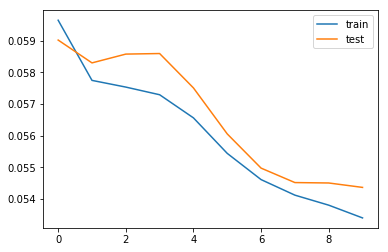

In [469]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

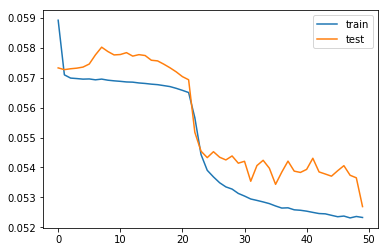

In [429]:
#So this is produced by the lat iteneration
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

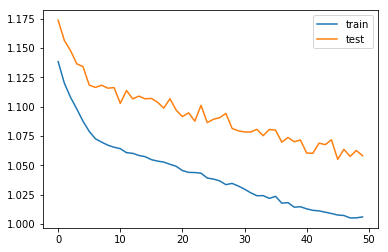

In [417]:
#This was produced with the data not scaled using MaxMin
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

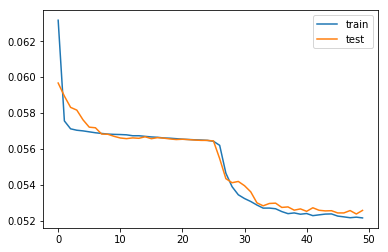

In [364]:
#This was produced with MaxMin and encoded data
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [470]:
yhat = model.predict(test_X)

In [471]:
yhat

array([[ 0.00159792],
       [ 0.0211197 ],
       [ 0.08997662],
       ..., 
       [ 0.09377536],
       [ 0.07198402],
       [ 0.09891393]], dtype=float32)

In [472]:
test_y

array([ 0.        ,  0.        ,  0.16666667, ...,  0.05555556,
        0.16666667,  0.22222222])

In [473]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)

In [474]:
inv_yhat = scaler.inverse_transform(inv_yhat)

ValueError: operands could not be broadcast together with shapes (2270,28) (36,) (2270,28) 

In [430]:
#Still struggling the get this part to work
#The goal is to reshape and inverse transform in order to get our original value for better 
#estimation
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

ValueError: operands could not be broadcast together with shapes (2270,28) (36,) (2270,28) 